In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os 
from matplotlib.pyplot import figure

from skimage import io
from skimage import color
from skimage.restoration import denoise_nl_means, estimate_sigma

import numpy as np
from numpy.fft import fft, fftfreq, ifft

from scipy import ndimage as nd
from scipy.fft import fft, ifft
from scipy import fftpack

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import time
import cv2
from math import sqrt
from math import exp

## Question 1 - (a)

Perform the Fourier transform, keeping only 1/4 largest coefficients, and perform inverse transform to obtain image A.

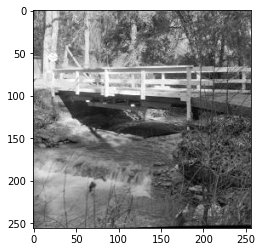

In [94]:
img = cv2.imread("bridge.jpg", 0)

plt.imshow(img, cmap = 'gray')
plt.show()

In [104]:
def mse(img1,img2):
    mse_fun =  np.mean((img1 - img2)**2 )
    return(mse_fun)

def coefficients(img):
    # Compute discrete fourier for the image
    discrete_ff = np.fft.fft2(img)
    # Compute the magnitudes of the coefficients
    mgs = np.log(np.abs(discrete_ff))
    return discrete_ff, mgs

def inverse_fft(coefficient,append=False):
    # Get the IDFT 
    inv = np.fft.ifft2(coefficient)
    # Get the magnitudes
    inv_mags = np.log(np.abs(inv))
    return inv, inv_mags

80.72322571998994


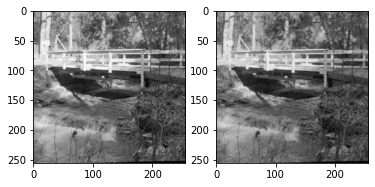

In [95]:
coefficients_all, mgs_all = coefficients(img)
x = sorted(mgs_all.reshape(-1))[-128*128]
coefficients_replace0 = np.where(mgs_all >= x, coefficients_all, 0)
img_new = mgs_all
img_new = np.where( mgs_all >= x, mgs_all, 0)

inverse1, inverse_mags1 = inverse_fft(coefficients_all)
inverse2, inverse_mags2 = inverse_fft(coefficients_replace0 )
img_a = np.abs(inverse2)
print(mse(img, img_a))
plt.subplot(121)
plt.imshow(np.abs(inverse1), cmap = 'gray')
plt.subplot(122)
plt.imshow(img_a, cmap = 'gray')
plt.show()

## Question 1 - (b)
Divide the image into 256 16x16 blocks. Perform Fourier Transform on each block, keeping only 1/4 largest coefficients in each block, and take inverse transform to obtain image B.

In [28]:
temp_h=[]
for i in range(16):
    temp_v = []
    for j in range(16):
        temp_img = img[16*(i):16*(i+1),16*(j):16*(j+1)]
        coefficients_all, mgs_all = coefficients(temp_img)
        x = sorted(mgs_all.reshape(-1))[-8*8]
        coefficients_replace0 = np.where(mgs_all >= x, coefficients_all, 0)
        temp_inverse, inverse_mags1 = inverse_fft(coefficients_replace0)
        temp_inverse= np.abs(temp_inverse)
        if j ==0:
            temp_v = temp_inverse
        else:
            temp_v = np.hstack([temp_v,temp_inverse])
    if i ==0:
        temp_h = temp_v
    else:
        temp_h = np.vstack([temp_h,temp_v])


<ipython-input-18-8346c56669dd>:10: RuntimeWarning: divide by zero encountered in log
  mgs = np.log(np.abs(discrete_ff))


88.57618046924406


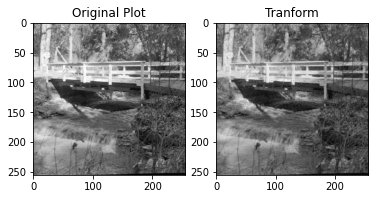

In [26]:
print(mse(img, temp_h))
ax = plt.subplot(121)
ax.title.set_text('Original Plot')
plt.imshow(img, cmap = 'gray')
ax1 = plt.subplot(122)
ax1.title.set_text('Tranform')
plt.imshow(temp_h, cmap = 'gray')
plt.show()

## Question 1 - (c)

Reduce the size of the original image to 128x128 by sub-sampling or averaging. Perform Fourier Transform on the 128x128 image. Zero-pad the coefficient matrix to a 256x256 array. Then perform inverse transform to obtain image C.

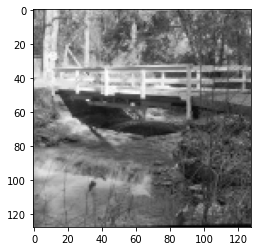

In [96]:
img_resize = cv2.resize(img,(128,128))
plt.imshow(img_resize, cmap = 'gray')
plt.show()

9051.978712452878


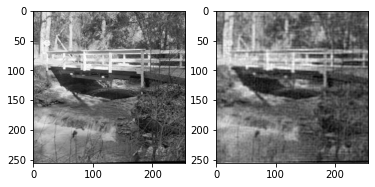

In [106]:
coefficients_all, mgs_all = coefficients(img_resize)
x = sorted(mgs_all.reshape(-1))[-64*64]
coefficients_replace0 = np.where(mgs_all >= x, coefficients_all, 0)
coefficients_replace0 = np.fft.fftshift(coefficients_replace0)
coefficients_replace0 = np.pad(coefficients_replace0, 64, "constant")
coefficients_replace0 = np.fft.ifftshift(coefficients_replace0)
inverse2, inverse_mags2 = inverse_fft(coefficients_replace0)
img_a = np.abs(inverse2)

print(mse(img, img_a))
plt.subplot(121)
plt.imshow(np.abs(inverse1), cmap = 'gray')
plt.subplot(122)
plt.imshow(img_a, cmap = 'gray')
plt.show()

## Question 2

Verify Fig 4.27 (page 249, DIP 3e). In other words, exchange the magnitude and phase of the discrete Fourier Transform of the following two images and show the results. 

In [54]:
img = cv2.imread("Fig0427_a.bmp", 0)
img2 = cv2.imread("Fig0424_a.bmp", 0)


img2 = cv2.resize(img2,(512,512))

In [56]:
f = np.fft.fft2(img)
fshift1 = np.fft.fftshift(f)
phase_spectrumA = np.angle(fshift1)
magnitude_spectrumB = 20*np.log(np.abs(fshift1))

f2 = np.fft.fft2(img2)
fshift2 = np.fft.fftshift(f2)
phase_spectrumB = np.angle(fshift2)
magnitude_spectrumB = 20*np.log(np.abs(fshift2))

In [68]:
# convert image to floats and do dft saving as complex output
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
# apply shift of origin from upper left corner to center of image
dft_shift = np.fft.fftshift(dft)
# extract magnitude and phase images
mag, phase = cv2.cartToPolar(dft_shift[:,:,0], dft_shift[:,:,1])



# convert image to floats and do dft saving as complex output
dft2 = cv2.dft(np.float32(img2), flags = cv2.DFT_COMPLEX_OUTPUT)
# apply shift of origin from upper left corner to center of image
dft_shift2 = np.fft.fftshift(dft2)
# extract magnitude and phase images
mag2, phase2 = cv2.cartToPolar(dft_shift2[:,:,0], dft_shift2[:,:,1])


In [84]:
##############    mag, phase2    ##############
# convert magnitude and phase into cartesian real and imaginary components
real, imag = cv2.polarToCart(mag, phase2)
# combine cartesian components into one complex image
back = cv2.merge([real, imag])
# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(back)
# do idft saving as complex output
img_back = cv2.idft(back_ishift)
# combine complex components into original image again
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
# re-normalize to 8-bits
min, max = np.amin(img_back, (0,1)), np.amax(img_back, (0,1))
print(min,max)
img_back_1 = cv2.normalize(img_back, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)


##############    mag2, phase    ##############
# convert magnitude and phase into cartesian real and imaginary components
real, imag = cv2.polarToCart(mag2, phase)
# combine cartesian components into one complex image
back = cv2.merge([real, imag])
# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(back)
# do idft saving as complex output
img_back = cv2.idft(back_ishift)
# combine complex components into original image again
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
# re-normalize to 8-bits
min, max = np.amin(img_back, (0,1)), np.amax(img_back, (0,1))
print(min,max)
img_back_2 = cv2.normalize(img_back, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

12.67597 194910750.0
72.0633 35218452.0


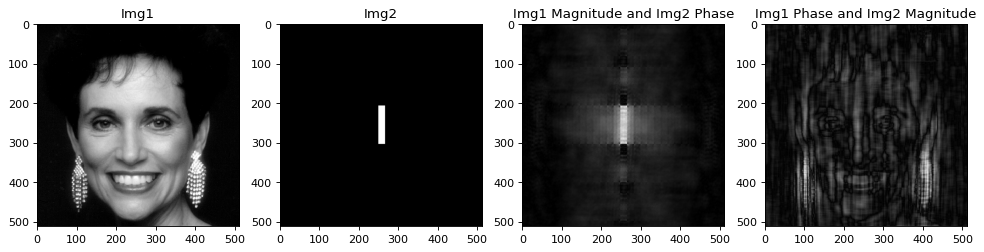

In [91]:
figure(figsize = (15, 15), dpi = 80)

ax1 = plt.subplot(241)
ax1.title.set_text('Img1')
plt.imshow(img, cmap = 'gray')
ax1 = plt.subplot(242)
ax1.title.set_text('Img2')
plt.imshow(img2, cmap = 'gray')
ax1 = plt.subplot(243)
ax1.title.set_text('Img1 Magnitude and Img2 Phase')
plt.imshow(img_back_1, cmap = 'gray')
ax1 = plt.subplot(244)
ax1.title.set_text('Img1 Phase and Img2 Magnitude')
plt.imshow(img_back_2, cmap = 'gray')
plt.show()

## Question4

(a) Discuss the limiting effect of repeatedly applying a Gaussian low-pass filter to a digital image using frequency domain analysis. (Ignore border effects). (5%) (b) Repeat (a) using median filter in the spatial domain. (5%). Discuss your findings.

In [ ]:
img = io.imread("dog1.jpg")
plt.imshow(img)
plt.show()

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
img = rgb2gray(img)

plt.imshow(img,cmap="gray")
plt.title("Gray")
plt.show()


for i in range(1000):
    img = nd.median_filter(img, size = 10)
    plt.imshow(img,cmap="gray")